# Using the EFD python client to query metrics from analysis_tools
**Description:** Demonstrate how to query metric values produced with [analysis_tools](https://github.com/lsst/analysis_tools)[analysis_tools](https://github.com/lsst/analysis_tools) using the EFD python client for the Sasquatch environment. 

More information at https://sasquatch.lsst.io/


**Last verified to run:** 2024-04-09

**LSST Science Piplines version:** w_2024_10

**Container Size:** any

**Location:** This notebook was developed on the S3DF cluster at the USDF.

## Test at USDF for the ops_rehersal_prep_2k_v1
- sylvie Dagoret-Campagne
- date 2024-04-09
- w_2024_10

In [1]:
!eups list -s | grep lsst_distrib

lsst_distrib          g4213664e8e+399544b0f1 	current w_2024_10 setup


Currently, the analysis_tools metrics are dispatched to the USDF dev Sasquatch environment, indicated with the `usdfdev_efd` alias, and are located in the `lsst.dm` database.

In [2]:
from lsst_efd_client import EfdClient
client = EfdClient("usdfdev_efd", db_name="lsst.dm")

In [3]:
import matplotlib.pyplot as plt

### List Topics 

The topics correspond to individual analysis tools, e.g., as specified in the pipeline yaml file [coaddQualityCore.yaml](https://github.com/lsst/analysis_tools/blob/18877759150ddbd865aecc4be00199d1975baee4/pipelines/coaddQualityCore.yaml#L9). Consider `e1Diff` as an example.

In [4]:
topics = await client.get_topics()
for t in topics: print(t)

lsst.dm.NumDiaSources
lsst.dm.NumStreakCenterDiaSources
lsst.dm.NumStreakDiaSources
lsst.dm.ap12PsfSky
lsst.dm.astromDiffMetrics
lsst.dm.blendMetrics
lsst.dm.calexpMetrics
lsst.dm.calexpSummaryMetrics
lsst.dm.calibrate
lsst.dm.constantTool
lsst.dm.diaSourcesGoodVsBadRatio
lsst.dm.diffimMetadataMetric
lsst.dm.e1Diff
lsst.dm.e1DiffScatterMetric
lsst.dm.e2Diff
lsst.dm.e2DiffScatterMetric
lsst.dm.isolatedDeblenderMetrics
lsst.dm.matchedRefCModelFluxChiMetric
lsst.dm.matchedRefCModelMagChi
lsst.dm.matchedRefCModelMagDiff
lsst.dm.matchedRefCModelMagDiffMetric
lsst.dm.matchedRefMagChiMetric
lsst.dm.matchedRefPositionXChi
lsst.dm.matchedRefPositionXChiMetric
lsst.dm.matchedRefPositionXDiff
lsst.dm.matchedRefPositionXDiffMetric
lsst.dm.matchedRefPositionYChi
lsst.dm.matchedRefPositionYChiMetric
lsst.dm.matchedRefPositionYDiff
lsst.dm.matchedRefPositionYDiffMetric
lsst.dm.numDiaSourcesAll
lsst.dm.numDiaSourcesHighReliability
lsst.dm.numDiaSourcesLowReliability
lsst.dm.numDiaSourcesNanReliability

## Show the List of metrics

For a given topic, the fields correspond to metadata and metrics. As an example, the fields corresponding to metrics in the topic `e1Diff` where specified as keys in the `MetricMeasurementBundle` for the [E1Diff](https://github.com/lsst/analysis_tools/blob/18877759150ddbd865aecc4be00199d1975baee4/python/lsst/analysis/tools/atools/shapes.py#L141) class in analysis tools. 

In [5]:
await client.get_fields("lsst.dm.e1Diff")
#await client.get_fields("lsst.dm.stellarPhotometricRepeatability")

['band',
 'dataset_tag',
 'dataset_type',
 'day_obs',
 'detector',
 'exposure',
 'g_highSNStars_count',
 'g_highSNStars_median',
 'g_highSNStars_sigmaMad',
 'g_lowSNStars_count',
 'g_lowSNStars_median',
 'g_lowSNStars_sigmaMad',
 'group',
 'i_highSNStars_count',
 'i_highSNStars_median',
 'i_highSNStars_sigmaMad',
 'i_lowSNStars_count',
 'i_lowSNStars_median',
 'i_lowSNStars_sigmaMad',
 'id',
 'instrument',
 'patch',
 'physical_filter',
 'r_highSNStars_count',
 'r_highSNStars_median',
 'r_highSNStars_sigmaMad',
 'r_lowSNStars_count',
 'r_lowSNStars_median',
 'r_lowSNStars_sigmaMad',
 'reference_package',
 'reference_package_timestamp',
 'reference_package_version',
 'run',
 'run_timestamp',
 'skymap',
 'timestamp',
 'tract',
 'u_highSNStars_count',
 'u_highSNStars_median',
 'u_highSNStars_sigmaMad',
 'u_lowSNStars_count',
 'u_lowSNStars_median',
 'u_lowSNStars_sigmaMad',
 'visit',
 'y_highSNStars_count',
 'y_highSNStars_median',
 'y_highSNStars_sigmaMad',
 'y_lowSNStars_count',
 'y_lowS

## Query the list of Metrics

We can query a given topic using [InfluxQL syntax](https://docs.influxdata.com/influxdb/v1/query_language/explore-data). 
The resilt comes as pandas table.

Notice that the columns in the returned DataFrame match the fields above.

### Example with e1Diff

In [6]:
query = '''SELECT * FROM "lsst.dm.e1Diff" WHERE time > now() - 100d '''
#query = '''SELECT * FROM "lsst.dm.stellarPhotometricRepeatability" WHERE time > now() - 100d '''
df = await client.influx_client.query(query)
df.columns.values

array(['band', 'dataset_tag', 'dataset_tag_1', 'dataset_type', 'day_obs',
       'detector', 'exposure', 'g_highSNStars_count',
       'g_highSNStars_median', 'g_highSNStars_sigmaMad',
       'g_lowSNStars_count', 'g_lowSNStars_median',
       'g_lowSNStars_sigmaMad', 'group', 'i_highSNStars_count',
       'i_highSNStars_median', 'i_highSNStars_sigmaMad',
       'i_lowSNStars_count', 'i_lowSNStars_median',
       'i_lowSNStars_sigmaMad', 'id', 'instrument', 'patch',
       'physical_filter', 'r_highSNStars_count', 'r_highSNStars_median',
       'r_highSNStars_sigmaMad', 'r_lowSNStars_count',
       'r_lowSNStars_median', 'r_lowSNStars_sigmaMad',
       'reference_package', 'reference_package_timestamp',
       'reference_package_version', 'run', 'run_1', 'run_timestamp',
       'skymap', 'skymap_1', 'timestamp', 'tract', 'tract_1',
       'u_highSNStars_count', 'u_highSNStars_median',
       'u_highSNStars_sigmaMad', 'u_lowSNStars_count',
       'u_lowSNStars_median', 'u_lowSNStars_sig

Inspect the table. Each row corresponds to one `MetricMeasurementBundle` from analysis tools.

In [7]:
df

,band,dataset_tag,dataset_tag_1,dataset_type,day_obs,detector,exposure,g_highSNStars_count,g_highSNStars_median,g_highSNStars_sigmaMad,...,y_highSNStars_sigmaMad,y_lowSNStars_count,y_lowSNStars_median,y_lowSNStars_sigmaMad,z_highSNStars_count,z_highSNStars_median,z_highSNStars_sigmaMad,z_lowSNStars_count,z_lowSNStars_median,z_lowSNStars_sigmaMad
2024-01-05 12:00:00+00:00,,HSC/RC2_subset/nightly,HSC/RC2_subset/nightly,objectTableCore_metrics,None,,,0,0.000000,0.000000,...,0.0,55.0,0.000106,0.003206,0.0,0.0,0.0,91.0,0.000773,0.003090
2024-01-06 12:00:00+00:00,,HSC/RC2_subset/nightly,HSC/RC2_subset/nightly,objectTableCore_metrics,None,,,0,0.000000,0.000000,...,0.0,55.0,0.000106,0.003206,0.0,0.0,0.0,91.0,0.000773,0.003090
2024-01-07 12:00:00+00:00,,HSC/RC2_subset/nightly,HSC/RC2_subset/nightly,objectTableCore_metrics,None,,,0,0.000000,0.000000,...,0.0,56.0,0.000109,0.003205,0.0,0.0,0.0,91.0,0.000773,0.003090
2024-01-08 12:00:00+00:00,,HSC/RC2_subset/nightly,HSC/RC2_subset/nightly,objectTableCore_metrics,None,,,0,0.000000,0.000000,...,0.0,56.0,0.000109,0.003205,0.0,0.0,0.0,91.0,0.000773,0.003090
2024-01-10 12:00:00+00:00,,HSC/RC2_subset/nightly,HSC/RC2_subset/nightly,objectTableCore_metrics,None,,,0,0.000000,0.000000,...,0.0,55.0,0.000106,0.003206,0.0,0.0,0.0,91.0,0.000773,0.003090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-08 00:00:18+00:00,,nightlyvalidation,nightlyvalidation,objectTableCore_metrics,,,,198,0.000369,0.001531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-08 00:00:18+00:00,,nightlyvalidation,nightlyvalidation,objectTableCore_metrics,,,,4,0.000622,0.000443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-08 00:00:18+00:00,,nightlyvalidation,nightlyvalidation,objectTableCore_metrics,,,,2852,0.000461,0.001255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-08 12:00:00+00:00,,HSC/RC2_subset/nightly,HSC/RC2_subset/nightly,objectTableCore_metrics,,,,0,0.000000,0.000000,...,0.0,52.0,-0.001268,0.004337,0.0,0.0,0.0,92.0,0.000599,0.002957


### Which instrument has metrics data

In [8]:
df["dataset_tag"].unique()

array(['HSC/RC2_subset/nightly', 'HSC/RC2', 'DC2/TestMed1', 'LATISS/DRP',
       'Generic', 'nightlyvalidation'], dtype=object)

Suppose that we are only interested in metrics with a given tag, e.g., `HSC/RC2`. We can refine our query as follows to select on field values.

In [9]:
#query = '''SELECT * FROM "lsst.dm.e1Diff" WHERE time > now() - 100d AND "dataset_tag" = 'HSC/RC2' '''
query = '''SELECT * FROM "lsst.dm.e1Diff" WHERE time > now() - 360d AND "dataset_tag" = 'LATISS/DRP' '''
#query = '''SELECT * FROM "lsst.dm.e1Diff" WHERE time > now() - 100d AND "dataset_tag" = 'LATISS/DRP' '''
#query = '''SELECT * FROM "lsst.dm.stellarPhotometricRepeatability" WHERE time > now() - 100d AND "dataset_tag" = 'LATISS/DRP' '''
df = await client.influx_client.query(query)
df

,band,dataset_tag,dataset_tag_1,dataset_type,day_obs,detector,exposure,g_highSNStars_count,g_highSNStars_median,g_highSNStars_sigmaMad,...,y_highSNStars_sigmaMad,y_lowSNStars_count,y_lowSNStars_median,y_lowSNStars_sigmaMad,z_highSNStars_count,z_highSNStars_median,z_highSNStars_sigmaMad,z_lowSNStars_count,z_lowSNStars_median,z_lowSNStars_sigmaMad
2023-08-31 00:00:00+00:00,,LATISS/DRP,LATISS/DRP,objectTableCore_metrics,None,,,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
2023-08-31 00:00:00+00:00,,LATISS/DRP,LATISS/DRP,objectTableCore_metrics,None,,,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
2023-08-31 00:00:00+00:00,,LATISS/DRP,LATISS/DRP,objectTableCore_metrics,None,,,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
2023-08-31 00:00:00+00:00,,LATISS/DRP,LATISS/DRP,objectTableCore_metrics,None,,,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
2023-08-31 00:00:00+00:00,,LATISS/DRP,LATISS/DRP,objectTableCore_metrics,None,,,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-15 23:41:36+00:00,,LATISS/DRP,LATISS/DRP,objectTableCore_metrics,None,,,0.0,0.000000,0.000000,...,None,None,None,None,None,None,None,None,None,None
2024-03-27 19:02:13+00:00,,LATISS/DRP,LATISS/DRP,objectTableCore_metrics,None,,,30.0,0.002629,0.004235,...,None,None,None,None,None,None,None,None,None,None
2024-03-27 19:02:13+00:00,,LATISS/DRP,LATISS/DRP,objectTableCore_metrics,None,,,0.0,0.000000,0.000000,...,None,None,None,None,None,None,None,None,None,None
2024-03-27 19:02:13+00:00,,LATISS/DRP,LATISS/DRP,objectTableCore_metrics,None,,,10.0,-0.000435,0.002064,...,None,None,None,None,None,None,None,None,None,None


In [10]:
dataset_tag = df["dataset_tag"].unique()[0]
dataset_tag

'LATISS/DRP'

In [11]:
df.columns

Index(['band', 'dataset_tag', 'dataset_tag_1', 'dataset_type', 'day_obs',
       'detector', 'exposure', 'g_highSNStars_count', 'g_highSNStars_median',
       'g_highSNStars_sigmaMad', 'g_lowSNStars_count', 'g_lowSNStars_median',
       'g_lowSNStars_sigmaMad', 'group', 'i_highSNStars_count',
       'i_highSNStars_median', 'i_highSNStars_sigmaMad', 'i_lowSNStars_count',
       'i_lowSNStars_median', 'i_lowSNStars_sigmaMad', 'id', 'instrument',
       'patch', 'physical_filter', 'r_highSNStars_count',
       'r_highSNStars_median', 'r_highSNStars_sigmaMad', 'r_lowSNStars_count',
       'r_lowSNStars_median', 'r_lowSNStars_sigmaMad', 'reference_package',
       'reference_package_timestamp', 'reference_package_version', 'run',
       'run_1', 'run_timestamp', 'skymap', 'skymap_1', 'timestamp', 'tract',
       'tract_1', 'u_highSNStars_count', 'u_highSNStars_median',
       'u_highSNStars_sigmaMad', 'u_lowSNStars_count', 'u_lowSNStars_median',
       'u_lowSNStars_sigmaMad', 'visit', 'y_h

Finally, access the specific metric values.

In [12]:
df.g_highSNStars_count

2023-08-31 00:00:00+00:00     NaN
2023-08-31 00:00:00+00:00     NaN
2023-08-31 00:00:00+00:00     NaN
2023-08-31 00:00:00+00:00     NaN
2023-08-31 00:00:00+00:00     NaN
                             ... 
2024-02-15 23:41:36+00:00     0.0
2024-03-27 19:02:13+00:00    30.0
2024-03-27 19:02:13+00:00     0.0
2024-03-27 19:02:13+00:00    10.0
2024-03-27 19:02:13+00:00     6.0
Name: g_highSNStars_count, Length: 137, dtype: float64

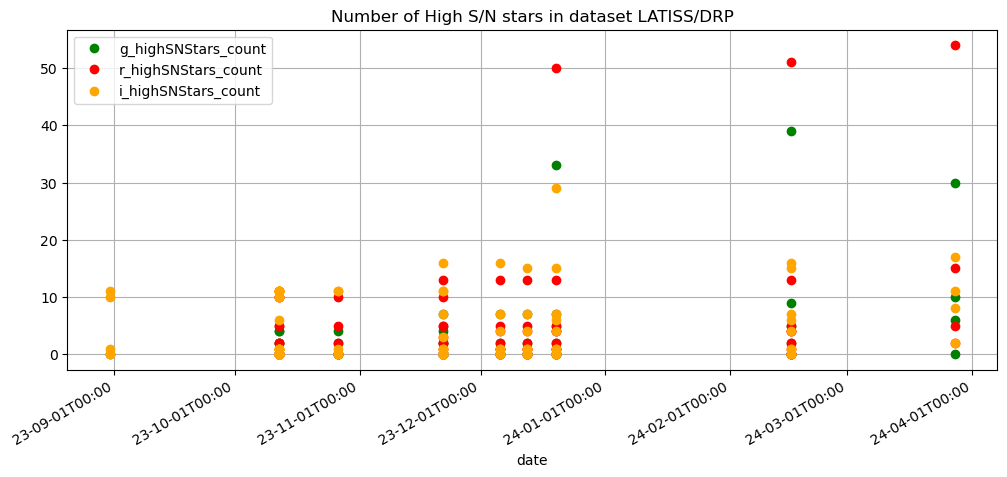

In [13]:
from matplotlib.dates import DateFormatter
date_form = DateFormatter("%y-%m-%dT%H:%M")

fig,ax = plt.subplots(1,1,figsize=(12,5))
df.plot(y="g_highSNStars_count",marker='o',color="g",lw=0,legend=True,grid=True,ax=ax)
df.plot(y="r_highSNStars_count",marker='o',color="r",lw=0,legend=True,grid=True,ax=ax)
df.plot(y="i_highSNStars_count",marker='o',color="orange",lw=0,legend=True,grid=True,ax=ax)
# remove those otherwise crash
#df.plot(y="z_highSNStars_count",marker='o',color="grey",lw=0,legend=True,grid=True,ax=ax)
#df.plot(y="y_highSNStars_count",marker='o',color="k",lw=0,legend=True,grid=True,ax=ax)
ax.set_title(f"Number of High S/N stars in dataset {dataset_tag}")
ax.set_xlabel("date")
ax.xaxis.set_major_formatter(date_form)

### Example with stellarPhotometricRepeatability

In [14]:
#query = '''SELECT * FROM "lsst.dm.stellarPhotometricRepeatability" WHERE time > now() - 100d AND "dataset_tag" = 'HSC/RC2' '''
query = '''SELECT * FROM "lsst.dm.stellarPhotometricRepeatability" WHERE time > now() - 365d AND "dataset_tag" = 'LATISS/DRP' '''
#query = '''SELECT * FROM "lsst.dm.e1Diff" WHERE time > now() - 100d AND "dataset_tag" = 'LATISS/DRP' '''
#query = '''SELECT * FROM "lsst.dm.stellarPhotometricRepeatability" WHERE time > now() - 100d AND "dataset_tag" = 'LATISS/DRP' '''
df = await client.influx_client.query(query)
df

,band,dataset_tag,dataset_tag_1,dataset_type,day_obs,detector,exposure,g_ct,g_stellarPhotRepeatOutlierFraction,g_stellarPhotRepeatStdev,...,u_ct,u_stellarPhotRepeatOutlierFraction,u_stellarPhotRepeatStdev,visit,y_ct,y_stellarPhotRepeatOutlierFraction,y_stellarPhotRepeatStdev,z_ct,z_stellarPhotRepeatOutlierFraction,z_stellarPhotRepeatStdev
2023-08-31 00:00:00+00:00,,LATISS/DRP,LATISS/DRP,matchedVisitCore_metrics,None,,,0,0.000000,0.000000,...,None,None,None,,None,None,None,None,None,None
2023-08-31 00:00:00+00:00,,LATISS/DRP,LATISS/DRP,matchedVisitCore_metrics,None,,,3,0.000000,4.667397,...,None,None,None,,None,None,None,None,None,None
2023-08-31 00:00:00+00:00,,LATISS/DRP,LATISS/DRP,matchedVisitCore_metrics,None,,,0,0.000000,0.000000,...,None,None,None,,None,None,None,None,None,None
2023-08-31 00:00:00+00:00,,LATISS/DRP,LATISS/DRP,matchedVisitCore_metrics,None,,,103,21.359222,40.037315,...,None,None,None,,None,None,None,None,None,None
2023-08-31 00:00:00+00:00,,LATISS/DRP,LATISS/DRP,matchedVisitCore_metrics,None,,,12,0.000000,18.895216,...,None,None,None,,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-15 23:41:36+00:00,,LATISS/DRP,LATISS/DRP,matchedVisitCore_metrics,None,,,0,0.000000,0.000000,...,None,None,None,,None,None,None,None,None,None
2024-03-27 19:02:13+00:00,,LATISS/DRP,LATISS/DRP,matchedVisitCore_metrics,None,,,63,6.349206,23.932522,...,None,None,None,,None,None,None,None,None,None
2024-03-27 19:02:13+00:00,,LATISS/DRP,LATISS/DRP,matchedVisitCore_metrics,None,,,70,7.142857,19.166304,...,None,None,None,,None,None,None,None,None,None
2024-03-27 19:02:13+00:00,,LATISS/DRP,LATISS/DRP,matchedVisitCore_metrics,None,,,22,13.636364,22.049360,...,None,None,None,,None,None,None,None,None,None


In [15]:
dataset_tag = df["dataset_tag"].unique()[0]
dataset_tag

'LATISS/DRP'

In [16]:
df["tract"].unique()[0]

'10643'

In [17]:
df["patch"].unique()[0]

''

In [18]:
df.columns

Index(['band', 'dataset_tag', 'dataset_tag_1', 'dataset_type', 'day_obs',
       'detector', 'exposure', 'g_ct', 'g_stellarPhotRepeatOutlierFraction',
       'g_stellarPhotRepeatStdev', 'group', 'i_ct',
       'i_stellarPhotRepeatOutlierFraction', 'i_stellarPhotRepeatStdev', 'id',
       'instrument', 'instrument_1', 'patch', 'physical_filter', 'r_ct',
       'r_stellarPhotRepeatOutlierFraction', 'r_stellarPhotRepeatStdev',
       'reference_package', 'reference_package_timestamp',
       'reference_package_version', 'run', 'run_1', 'run_timestamp', 'skymap',
       'skymap_1', 'timestamp', 'tract', 'tract_1', 'u_ct',
       'u_stellarPhotRepeatOutlierFraction', 'u_stellarPhotRepeatStdev',
       'visit', 'y_ct', 'y_stellarPhotRepeatOutlierFraction',
       'y_stellarPhotRepeatStdev', 'z_ct',
       'z_stellarPhotRepeatOutlierFraction', 'z_stellarPhotRepeatStdev'],
      dtype='object')

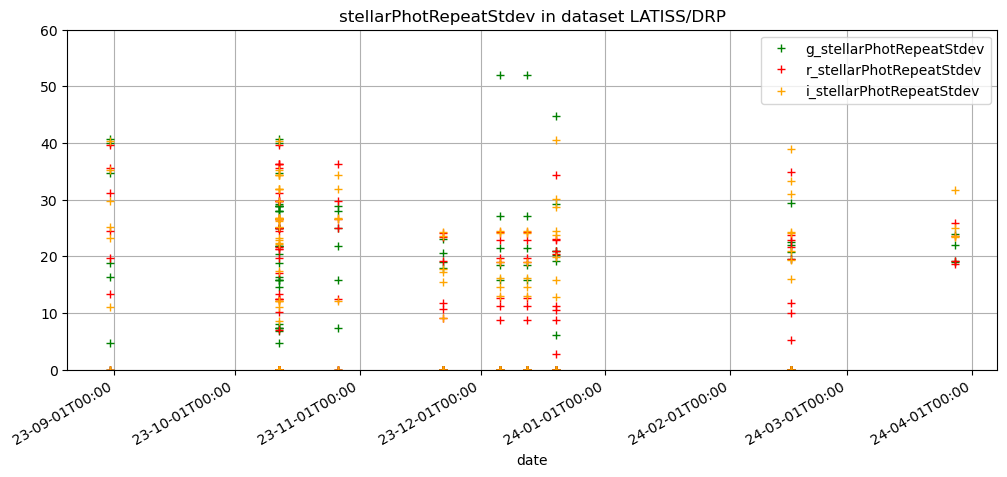

In [19]:
from matplotlib.dates import DateFormatter
date_form = DateFormatter("%y-%m-%dT%H:%M")

fig,ax = plt.subplots(1,1,figsize=(12,5))
#df.plot(y="u_stellarPhotRepeatStdev",marker='+',color="b",lw=0,legend=True,grid=True,ax=ax)
df.plot(y="g_stellarPhotRepeatStdev",marker='+',color="g",lw=0,legend=True,grid=True,ax=ax)
df.plot(y="r_stellarPhotRepeatStdev",marker='+',color="r",lw=0,legend=True,grid=True,ax=ax)
df.plot(y="i_stellarPhotRepeatStdev",marker='+',color="orange",lw=0,legend=True,grid=True,ax=ax)
#df.plot(y="z_stellarPhotRepeatStdev",marker='+',color="grey",lw=0,legend=True,grid=True,ax=ax)
#df.plot(y="y_stellarPhotRepeatStdev",marker='+',color="k",lw=0,legend=True,grid=True,ax=ax)

ax.set_title(f"stellarPhotRepeatStdev in dataset {dataset_tag}")
ax.set_xlabel("date")
ax.set_ylim(0.,60.)
ax.xaxis.set_major_formatter(date_form)

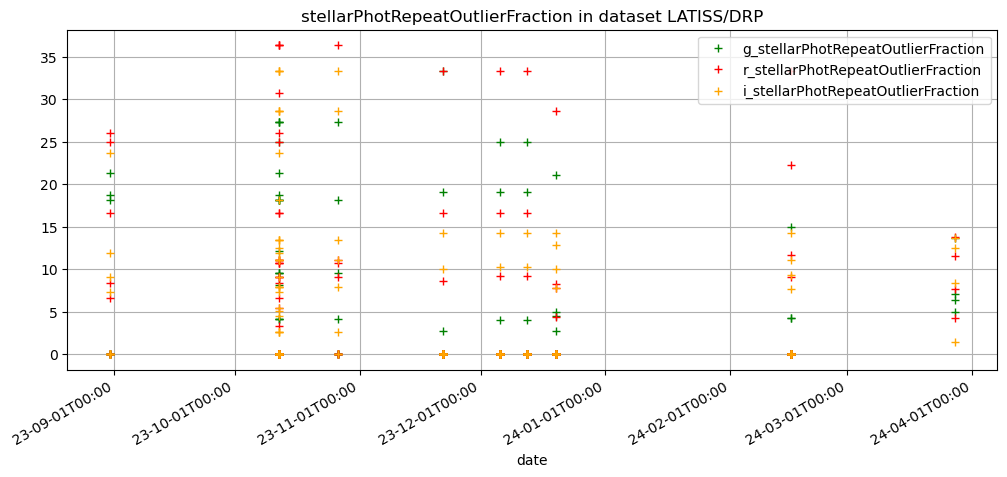

In [20]:
from matplotlib.dates import DateFormatter
date_form = DateFormatter("%y-%m-%dT%H:%M")

fig,ax = plt.subplots(1,1,figsize=(12,5))
#df.plot(y="u_stellarPhotRepeatOutlierFraction",marker='+',color="b",lw=0,legend=True,grid=True,ax=ax)
df.plot(y="g_stellarPhotRepeatOutlierFraction",marker='+',color="g",lw=0,legend=True,grid=True,ax=ax)
df.plot(y="r_stellarPhotRepeatOutlierFraction",marker='+',color="r",lw=0,legend=True,grid=True,ax=ax)
df.plot(y="i_stellarPhotRepeatOutlierFraction",marker='+',color="orange",lw=0,legend=True,grid=True,ax=ax)
#df.plot(y="z_stellarPhotRepeatOutlierFraction",marker='+',color="grey",lw=0,legend=True,grid=True,ax=ax)
#df.plot(y="y_stellarPhotRepeatOutlierFraction",marker='+',color="k",lw=0,legend=True,grid=True,ax=ax)

ax.set_title(f"stellarPhotRepeatOutlierFraction in dataset {dataset_tag}")
ax.set_xlabel("date")
#ax.set_ylim(0.,100.)
ax.xaxis.set_major_formatter(date_form)